## **Challenge Telecom X 2**

Realizar un modelo de aprendizaje automático para los datos de Churn.
Ahora se pretende identificar si un cliente potencial tiene probabilidad mayor de quedarse o dejar a la empresa.

Había utilizado el archivo que generé en el Challenge anterior, sin embargo, en el live proporcionaron otro archivo así que asumiendo el rol en el que otro equipo me dará su archivo, utilicé el nuevo.

#📌 Preparación de la base de datos

##Extracción

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datos = pd.read_csv('/content/tabela_tratada.csv')
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [227]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [228]:
datos.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

##Eliminación de Columnas Irrelevantes

In [229]:
#eliminar el ID
datos= datos.drop(columns='customerID')
datos.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

##Identificación de variables

* Nominales: Género, Tercera edad, casado, dependientes, servicio telefónico, Multilínea, Tipo de servicio de internet...etc.
* Ordinales: Tipo de contrato
* Numéricas discretas: meses de contrato.
* Numéricas continuas: Cargos totales, cargos mensuales, cargos diarios.
***Observación: algunas columnas podrían considerarse ordinales por ejemplo, en la columna de backup service, podría ser el nivel más bajo que no tiene internet, el segundo nivel que si tiene internet pero no tiene el servicio y el más alto que tiene internet y además el servicio, por esto más adelante se propone crear una columna adicional. Posteriormente sería conveniente probar esta idea usando OrdinalEncoder o el mapeo de pandas pero no lo hice en este ejercicio.

##Transformación de datos

In [230]:
#Para evitar afectar la base original, creamos un nuevo data frame
datos_limpios = datos.copy()

Se propone la creación de una nueva columna llamada "No_internet_service".
 En la clase se propuso agrupar los No y los No internet service , mi propuesta es si hacer esa agrupación, pero como son datos ordinales conservar
la información en una columna creada aparte.
Explicación detallada: Hay columnas que no son binarias, por ejemplo la 'Phone Multiplelines' contiene ['No' 'Yes' 'No phone service']
Otras columnas contienen ['No' 'Yes' 'No internet service']: 'internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection'
'internet.TechSupport','internet.StreamingTV','internet.StreamingMovies'
Teoricamente, si no tiene servicio de internet, tampoco tiene los servicios por ello podríamos asumir que podemos substituir 'no service' por 'no'
una forma fácil es indicar si los registros que dicen 'No internet service' son los mismos para las 6 columnas

In [231]:
#Se propone la creación de una columna adiciona llamada NO INTERNET Service, ya que es información redundante en la base, comprobemos la teoría
#

In [232]:
conteo_No = datos_limpios['internet.OnlineSecurity'].value_counts()['No internet service']
print(conteo_No)

1526


In [233]:
conteo_Nob = datos_limpios['internet.OnlineBackup'].value_counts()['No internet service']
print(conteo_Nob)


1526


In [234]:
filtro=datos_limpios[(datos_limpios['internet.OnlineBackup'] == 'No internet service') |
                      (datos_limpios['internet.OnlineSecurity'] == 'No internet service') |
                      (datos_limpios['internet.DeviceProtection'] == 'No internet service') |
                      (datos_limpios['internet.TechSupport'] == 'No internet service') |
                      (datos_limpios['internet.StreamingTV'] == 'No internet service') |
                      (datos_limpios['internet.StreamingMovies'] == 'No internet service')
                      ]
filtro.shape

(1526, 21)

Como podemos observar, la cardinalidad se mantiene y por tanto las filas son las mismas, ahora extraemos la columna y procedemos a volver binarias todas las filas relacionadas.

In [235]:
import numpy as np

In [236]:
datos_limpios['internet.NoService']=np.where(datos_limpios['internet.OnlineBackup'] == 'No internet service',1,0)

In [237]:
datos_limpios.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total',
       'internet.NoService'],
      dtype='object')

In [238]:
conteo = datos_limpios['internet.NoService'].value_counts()[1]
print(conteo)

1526


In [239]:
#convertimos los 'No service' a 'No' en las 6 columnas

In [240]:
columnas_a_cambiar = ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                      'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

In [241]:
for columna in columnas_a_cambiar:
    datos_limpios[columna] = datos_limpios[columna].replace('No internet service','No')

In [242]:
#Ahora vamos a transformar las variables categoricas
categoricas= ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod']

In [243]:
datos_codificado=pd.get_dummies(datos_limpios, columns=categoricas, drop_first=True)

In [244]:
datos_codificado.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,internet.NoService,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,0,False,False,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,0,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,0,True,True,False,False,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,0,True,True,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,0,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


In [245]:
datos_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   internet.NoService                             7043 non-null   int64  
 6   Churn_Yes                                      7043 non-null   bool   
 7   customer.gender_Male                           7043 non-null   bool   
 8   customer.Partner_Yes                           7043 non-null   bool   
 9   customer.Dependents_Yes                        7043 

In [246]:
datos_codificado.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
internet.NoService,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0


Se toma la decisión de elimniar las filas con valores nulos

In [247]:
datos_codificado=datos_codificado.dropna()

In [248]:
datos_codificado.shape  #vemos que se retiraron los 11 elementos

(7032, 27)

#📊 Análisis de Correlación y Selección de Variables

##Obtener la correlación de las columnas

In [249]:
corr = datos_codificado.corr()

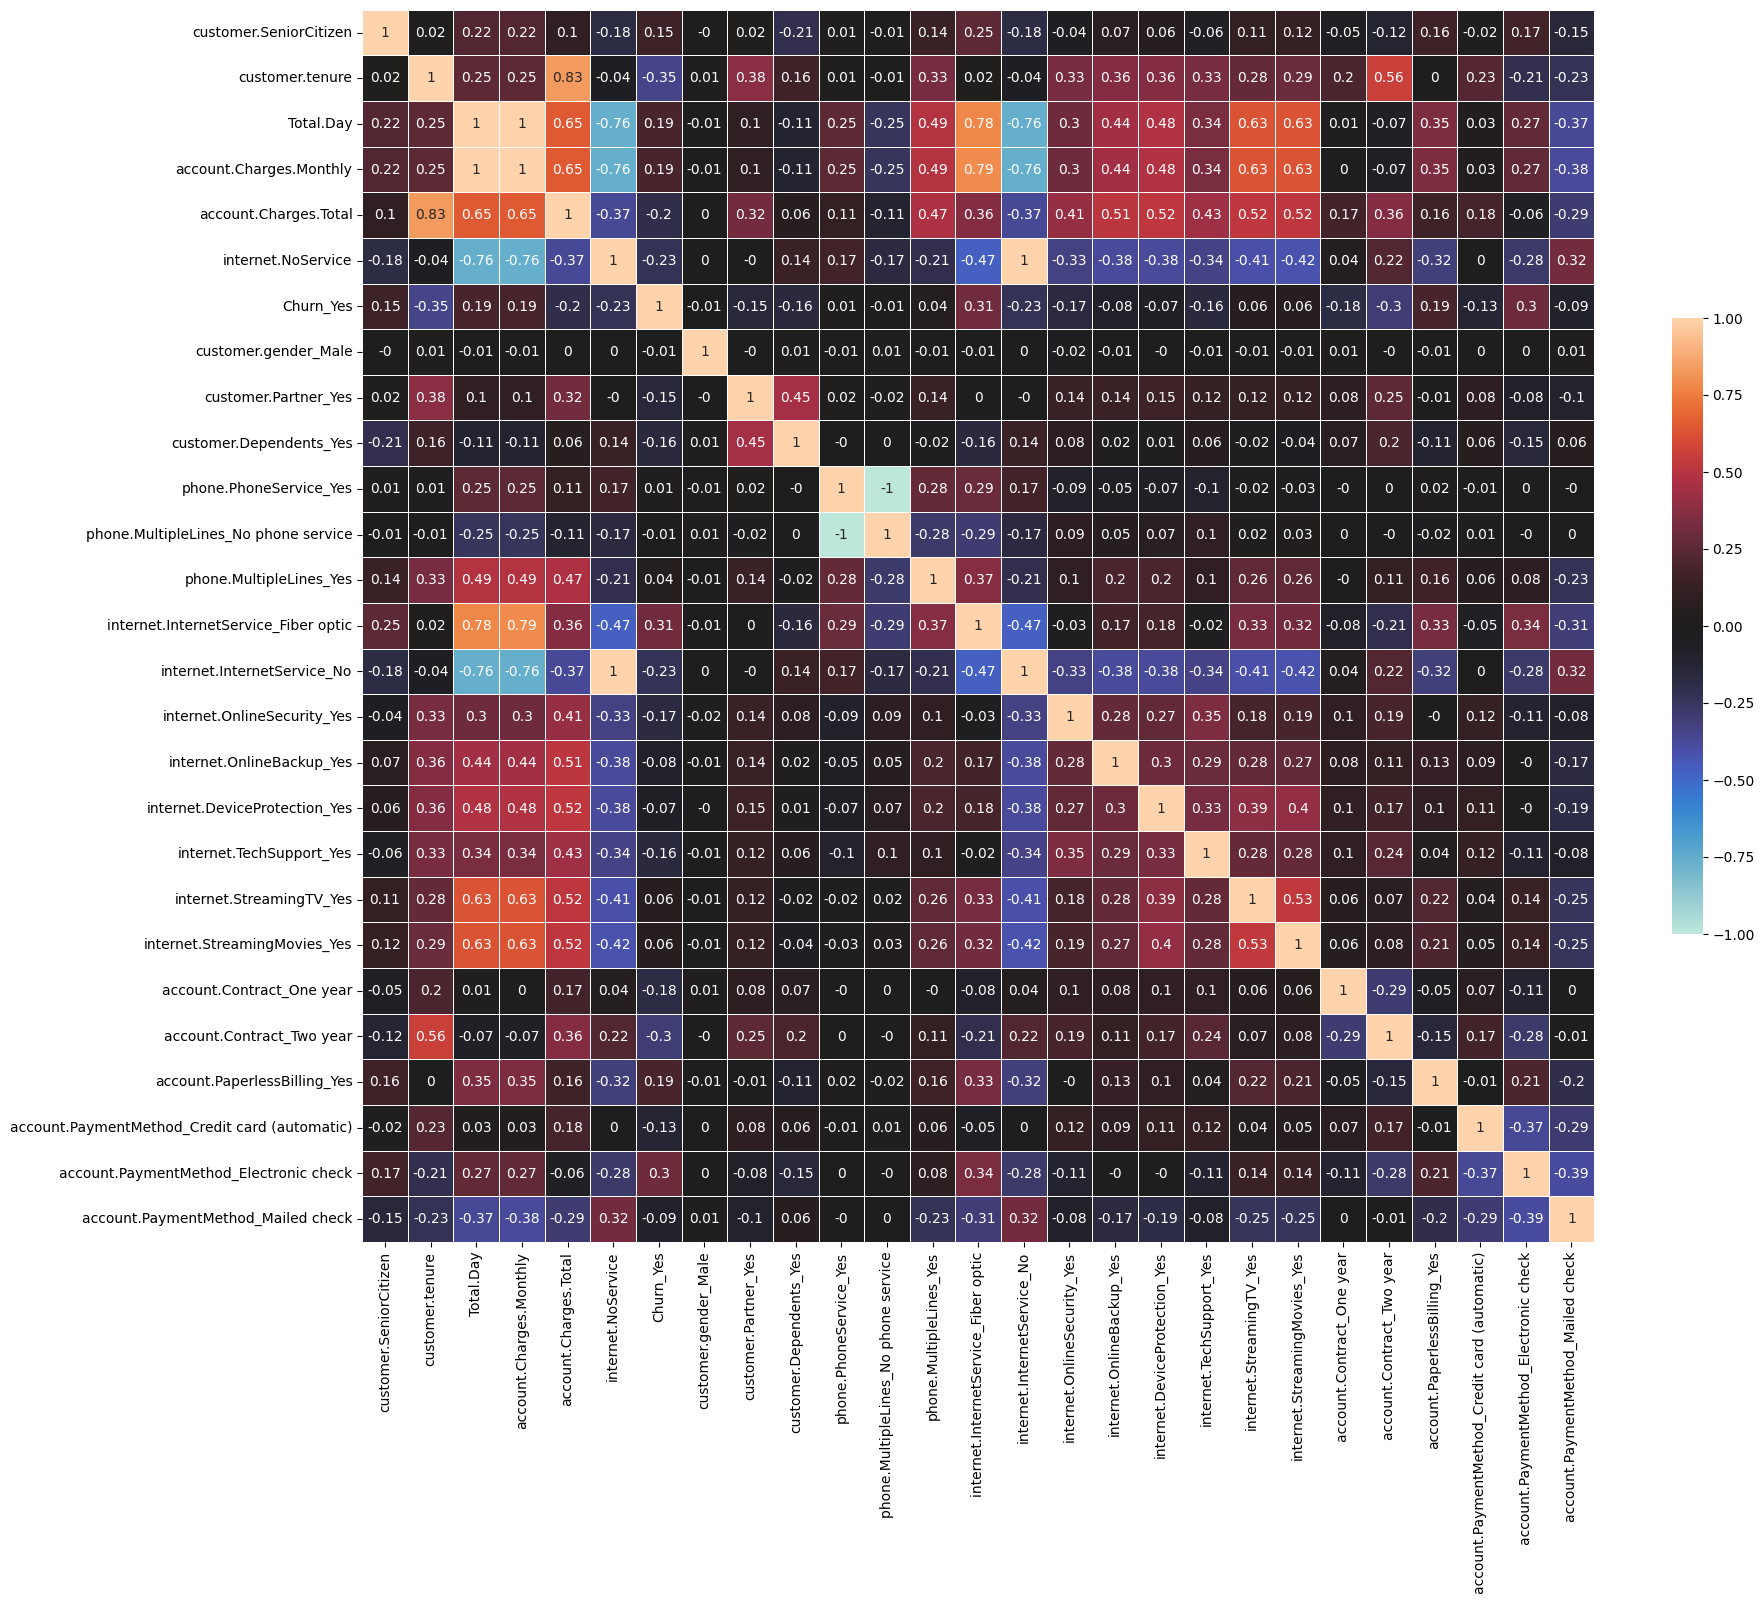

In [250]:
fig, ax =plt.subplots(figsize=(20,16))
ax=sns.heatmap(np.round(corr,2), vmax=1, vmin=-1, center=0,square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

In [251]:
### Se ordenó la lista de correlación para identificar las variables con menor impacto visualmente:
sorted(corr['Churn_Yes'])

[-0.35404935895325157,
 -0.30155233962395384,
 -0.22757762044656207,
 -0.22757762044656207,
 -0.1994840835675635,
 -0.17822502328995055,
 -0.17126992353349874,
 -0.16471590834410724,
 -0.16312843938821997,
 -0.149981925620059,
 -0.1346868372340781,
 -0.09077284582583403,
 -0.08230696876508213,
 -0.06619251684228528,
 -0.011691398865421608,
 -0.008544643224946259,
 0.01169139886542153,
 0.04003273987252134,
 0.060859936681458594,
 0.06325398027519348,
 0.15054105341568091,
 0.19145432108004568,
 0.19203015640006596,
 0.19285821847007817,
 0.30145463790856447,
 0.3074625906981303,
 1.0]

Ahora que hemos ordenado de forma ascendente, podemos identificar claramente los valores de las columnas y podemos establecer un limite de inclusión.

In [252]:
#definir el umbral
umbral = 0.15
variables_relevantes=corr.index[abs(corr['Churn_Yes']) >= umbral].tolist()

In [253]:
variables_relevantes

['customer.SeniorCitizen',
 'customer.tenure',
 'Total.Day',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'internet.NoService',
 'Churn_Yes',
 'customer.Dependents_Yes',
 'internet.InternetService_Fiber optic',
 'internet.InternetService_No',
 'internet.OnlineSecurity_Yes',
 'internet.TechSupport_Yes',
 'account.Contract_One year',
 'account.Contract_Two year',
 'account.PaperlessBilling_Yes',
 'account.PaymentMethod_Electronic check']

In [254]:
corr_filtrada=corr.loc[variables_relevantes,variables_relevantes]

In [255]:
sorted(corr_filtrada['Churn_Yes'])

[-0.35404935895325157,
 -0.30155233962395384,
 -0.22757762044656207,
 -0.22757762044656207,
 -0.1994840835675635,
 -0.17822502328995055,
 -0.17126992353349874,
 -0.16471590834410724,
 -0.16312843938821997,
 0.15054105341568091,
 0.19145432108004568,
 0.19203015640006596,
 0.19285821847007817,
 0.30145463790856447,
 0.3074625906981303,
 1.0]

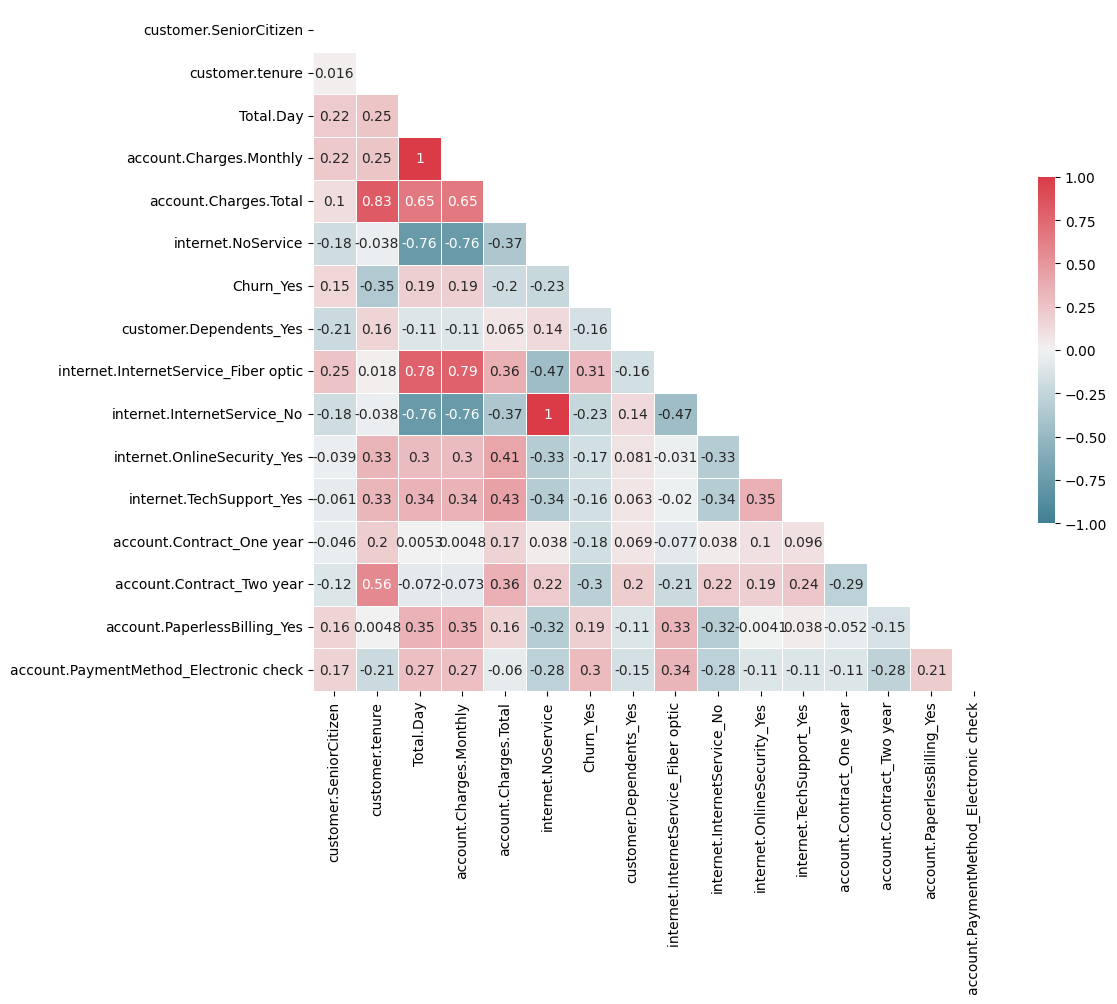

In [256]:
#mascara=np.triu(np.ones_like(corr_filtrada,dtype=bool))
mascara = np.zeros_like(corr_filtrada, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_filtrada, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

##Análisis de multicolineariedad

In [257]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
#abajo de 5 es multicolinearidad baja
#1 o menor que uno, no hay multicolinearidad

In [258]:
X=datos_codificado.drop(columns=['Churn_Yes'])

In [259]:
X_const=add_constant(X)

In [260]:
X_const = X_const.astype(float)

#Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
6,internet.NoService,inf
10,phone.PhoneService_Yes,inf
11,phone.MultipleLines_No phone service,inf
14,internet.InternetService_No,inf
4,account.Charges.Monthly,992.623632
13,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
20,internet.StreamingMovies_Yes,24.158588
19,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350


#Análisis dirigido

Boxplot de Churn con otras variables

#Dividimos los datos en Entrenamiento y Prueba

In [297]:
X=datos_codificado.drop('Churn_Yes',axis=1)  #separamos las variables explicativas
y=datos_codificado['Churn_Yes']

In [298]:
from sklearn.model_selection import train_test_split

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5) #que tenga la misma proporción de observaciones en cada conjunto
# si no se coloca train_size, por defecto va a ser de 25%

#Modelo 1: de referencia (Baseline) No balanceado No Normalizado

In [300]:
from sklearn.dummy import DummyClassifier

In [301]:
dummy = DummyClassifier()
dummy.fit(X_train,y_train)

dummy.score(X_test,y_test)

0.7345971563981043

El baseline está en 0.73

#Modelo 2: Arbol de decisión_Conjunto No balanceado_No normalizado

###Entrenamiento de árbol

In [302]:
from sklearn.tree import DecisionTreeClassifier

##Creamos un conjunto de validación para poder definir la poda del árbol

In [304]:
X_trainArbol, X_val, y_trainArbol, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=5)

Entrenamos el árbol sin especificar la profundidad para ver los resultados

In [314]:
for i in range(1,10):
  modelo_arbol = DecisionTreeClassifier(max_depth=i, random_state=5)
  modelo_arbol.fit(X_trainArbol,y_trainArbol)
  print(f' el score es:', modelo_arbol.score(X_val,y_val))
#modelo_arbol = DecisionTreeClassifier(random_state=5)
#modelo_arbol.fit(X_trainArbol,y_trainArbol)


 el score es: 0.7204013377926421
 el score es: 0.7779264214046823
 el score es: 0.7779264214046823
 el score es: 0.7779264214046823
 el score es: 0.7879598662207358
 el score es: 0.7846153846153846
 el score es: 0.7759197324414716
 el score es: 0.7745819397993311
 el score es: 0.7658862876254181


Vemos como con profundidad 5 se alcanza mayor score, ahora que hemos definido la profundidad probamos con el conjunto de prueba

In [330]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_trainArbol,y_trainArbol)

modelo_arbol.score(X_test,y_test)

0.7137440758293839

Breve ejercicio con validación cruzada

In [333]:
from sklearn.model_selection import cross_validate, StratifiedKFold  #Para mantener la proporción de datos en cada validación

In [334]:
from ctypes import c_void_p
modelo_arbolC = DecisionTreeClassifier(max_depth=5)
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_arbolC, X_train, y_train, cv=skf, scoring='recall')

In [336]:
cv_resultados

{'fit_time': array([0.01666689, 0.0147028 , 0.01443124, 0.01444149, 0.01483274]),
 'score_time': array([0.0047605 , 0.00490642, 0.0056169 , 0.00461411, 0.00453019]),
 'test_score': array([0.5408805 , 0.56603774, 0.41955836, 0.50943396, 0.44339623])}

In [308]:
from sklearn.metrics import confusion_matrix

In [337]:
y_previsto = modelo_arbol.predict(X_val)
matrix_confusion = confusion_matrix(y_val, y_previsto)
matrix_confusion

array([[899, 199],
       [210, 187]])

In [327]:
from sklearn.metrics import classification_report

In [328]:
print(classification_report(y_val, y_previsto))


              precision    recall  f1-score   support

       False       0.82      0.83      0.83      1098
        True       0.52      0.49      0.50       397

    accuracy                           0.74      1495
   macro avg       0.67      0.66      0.67      1495
weighted avg       0.74      0.74      0.74      1495



In [317]:
from sklearn.metrics import RocCurveDisplay

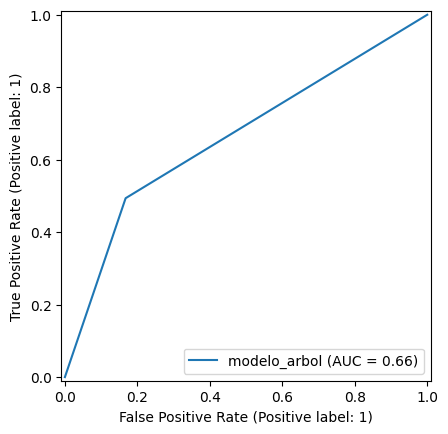

In [319]:
RocCurveDisplay.from_predictions(y_val,y_previsto, name='modelo_arbol');


In [320]:
from sklearn.metrics import roc_auc_score

In [326]:
print(f'El área bajo la curva ROC es:  {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC es:  0.6630626786509017


In [269]:
from sklearn.tree import plot_tree

In [270]:
datos_codificado.columns

Index(['customer.SeniorCitizen', 'customer.tenure', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total',
       'internet.NoService', 'Churn_Yes', 'customer.gender_Male',
       'customer.Partner_Yes', 'customer.Dependents_Yes',
       'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic',
       'internet.InternetService_No', 'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_Yes', 'internet.DeviceProtection_Yes',
       'internet.TechSupport_Yes', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',
       'account.Contract_Two year', 'account.PaperlessBilling_Yes',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')

In [271]:
valores_columnas=['customer.SeniorCitizen', 'customer.tenure', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total',
       'internet.NoService', 'customer.gender_Male',
       'customer.Partner_Yes', 'customer.Dependents_Yes',
       'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic',
       'internet.InternetService_No', 'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_Yes', 'internet.DeviceProtection_Yes',
       'internet.TechSupport_Yes', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',
       'account.Contract_Two year', 'account.PaperlessBilling_Yes',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check']

In [272]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol, filled=True, class_names=['no','si'], fontsize=6, feature_names=valores_columnas);

Output hidden; open in https://colab.research.google.com to view.

In [273]:
#Establecemos profundidad de 7 como prueba
modelo_arbol = DecisionTreeClassifier(max_depth=7, random_state=5)
modelo_arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=5)

In [274]:
modelo_arbol.score(X_test,y_test) # con conjunto de prueba, queda en .77701934015

0.7791469194312797

#Normalización

In [275]:
from sklearn.preprocessing import MinMaxScaler

In [276]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

In [277]:
normalizacion = MinMaxScaler()
columnas_numericas = ['customer.tenure', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total']
X_train_norm[columnas_numericas]=normalizacion.fit_transform(X_train[columnas_numericas])
X_test_norm[columnas_numericas]=normalizacion.transform(X_test[columnas_numericas])

In [278]:
X_train_norm.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,internet.NoService,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
5176,1,0.323944,0.679666,0.618834,0.238824,0,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
6291,0,0.647887,0.058496,0.016442,0.107633,1,True,True,True,True,...,False,False,False,False,True,False,False,False,False,True
6376,0,0.154930,0.545961,0.554559,0.098529,0,False,False,False,True,...,False,True,True,True,True,False,False,False,False,True
6110,0,0.042254,0.147632,0.112108,0.011505,0,True,False,False,False,...,True,False,False,False,False,False,True,False,True,False
907,1,0.718310,0.913649,0.920279,0.670805,0,True,False,False,True,...,True,True,True,True,False,False,True,False,True,False


#Balanceo de las clases

##Verificación de la proporción de Cancelación (Churn)

Revisamos el balanceo de las clases

In [279]:
conteo1 = datos_codificado['Churn_Yes'].value_counts()[1]
print(conteo1)

1869


/tmp/ipython-input-3607565646.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo1 = datos_codificado['Churn_Yes'].value_counts()[1]


In [280]:
conteo2 = datos_codificado['Churn_Yes'].value_counts()[0]
print(conteo2)

5163


/tmp/ipython-input-326196766.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo2 = datos_codificado['Churn_Yes'].value_counts()[0]


In [281]:
proporcion=conteo1/conteo2
print(proporcion)

0.36199883788495063


Conteo en conjunto de entrenamiento

In [282]:
conteo1 = y_train.value_counts()[1]
print(conteo1)
conteo2 = y_train.value_counts()[0]
print(conteo2)
proporcion=conteo1/conteo2
print('proporcion en conjunto de entrenamiento', proporcion)
conteo1 = y_test.value_counts()[1]
print(conteo1)
conteo2 = y_test.value_counts()[0]
print(conteo2)
proporcion=conteo1/conteo2
print('proporcion en conjunto de prueba',proporcion)

1589
4388
proporcion en conjunto de entrenamiento 0.3621239744758432
280
775
proporcion en conjunto de prueba 0.36129032258064514


/tmp/ipython-input-3558294203.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo1 = y_train.value_counts()[1]
/tmp/ipython-input-3558294203.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo2 = y_train.value_counts()[0]
/tmp/ipython-input-3558294203.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo1 = y_test.value_counts()[1]
/tmp/ipython-input-3558294203.py:9: FutureWarning: Series.__getitem__ treating keys

Se observa que efectivamente, se cumple la proporción en entrenamiento y prueba. Ahora vamos a balancear las clases. Quería hacer undersampling, pero como el conjunto de entrenamiento y prueba serían casí del mismo tamaño, opté al final por oversampling

In [283]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train_norm, y_train)


In [284]:
conteo1 = y_train_smote.value_counts()[1]
print(conteo1)
conteo2 = y_train_smote.value_counts()[0]
print(conteo2)
proporcion=conteo1/conteo2

4388
4388


/tmp/ipython-input-2765481027.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo1 = y_train_smote.value_counts()[1]
/tmp/ipython-input-2765481027.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo2 = y_train_smote.value_counts()[0]


Una vez balanceado entrenamos otro modelo, voy a probar con KNN


#Modelo 2: KNN

In [285]:
from sklearn.neighbors import KNeighborsClassifier

Acorde a la documentación, podemos elegir el aloritmo entre ['auto', 'ball_tree', 'kd_tree', 'brute']

In [286]:
knn= KNeighborsClassifier(n_neighbors=3, algorithm='auto')
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=3)

In [287]:
knn.score(X_test_norm,y_test)

0.7004739336492891

##Elegir modelo

In [288]:
lista=[('dummy',dummy,X_test),('arbol',modelo_arbol,X_test),('knn',knn,X_test_norm)]
for i in lista:
  print(f'La exactitud del modelo {i[0]}: {i[1].score(i[2],y_test)}')

La exactitud del modelo dummy: 0.7345971563981043
La exactitud del modelo arbol: 0.7791469194312797
La exactitud del modelo knn: 0.7004739336492891


##Exportamos el modelo ganador

In [289]:
import pickle

In [290]:
with open('modelo_champion.pkl','wb') as archivo:
  pickle.dump(modelo_arbol,archivo)

In [291]:
modelo_champion=pd.read_pickle('/content/modelo_champion.pkl')
#modelo_champion=predict(nuevo_dato)  #eso es para predecir sobr enuevos datos

CODIGO ANTERIOR----

##Conversión con OneHotEncoder

In [292]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [293]:
columns = X.columns

In [294]:
#'customer.tenure'->entero -> meses de contrato
one_hot =make_column_transformer((OneHotEncoder(drop='if_binary'),
                                  ['customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [295]:
X=one_hot.fit_transform(X)

ValueError: A given column is not a column of the dataframe

In [ ]:
one_hot.get_feature_names_out(columns)

In [ ]:
pd.DataFrame(X,columns=one_hot.get_feature_names_out(columns))

In [ ]:
label_encoder= LabelEncoder()
y=label_encoder.fit_transform(y)

In [ ]:
y

In [ ]:
"""#Transformar contenido de letras a números
datos['Churn']=datos['Churn'].replace('Yes',1)
datos['Churn']=datos['Churn'].replace('No',0)
datos['customer.gender']=datos['customer.gender'].replace('Male', 1)
datos['customer.gender']=datos['customer.gender'].replace('Female', 0)
#datos['customer.SeniorCitizen']=datos['customer.SeniorCitizen'].replace(0, 'No')
#datos['customer.SeniorCitizen']=datos['customer.SeniorCitizen'].replace(1, 'Si')
datos['customer.Partner']=datos['customer.Partner'].replace('Yes', 1)
datos['customer.Partner']=datos['customer.Partner'].replace('No', 0)
datos['customer.Dependents']=datos['customer.Dependents'].replace('Yes', 1)
datos['customer.Dependents']=datos['customer.Dependents'].replace('No', 0)
#datos['customer.tenure']=datos['customer.tenure'] #Está en entero
datos['phone.PhoneService']=datos['phone.PhoneService'].replace('Yes', 1)
datos['phone.PhoneService']=datos['phone.PhoneService'].replace('No', 0)
datos['phone.MultipleLines']=datos['phone.MultipleLines'].replace('Yes', 1)
datos['phone.MultipleLines']=datos['phone.MultipleLines'].replace('No', 0)
#definir qué hacer con No phone service
datos['phone.MultipleLines']=datos['phone.MultipleLines'].replace('No phone service', 'Sin telefono')
#Colocar etiquetado por columna
datos['internet.InternetService']=datos['internet.InternetService'].replace('Yes', 'Si')
datos['internet.InternetService']=datos['internet.InternetService'].replace('Fiber optic', 'Fibra optica')
datos['internet.OnlineSecurity']=datos['internet.OnlineSecurity'].replace('Yes', 'Si')
datos['internet.OnlineSecurity']=datos['internet.OnlineSecurity'].replace('No internet service','Sin internet')
datos['internet.OnlineBackup']=datos['internet.OnlineBackup'].replace('Yes', 'Si')
datos['internet.OnlineBackup']=datos['internet.OnlineBackup'].replace('No internet service','Sin internet')
datos['internet.DeviceProtection']=datos['internet.DeviceProtection'].replace('Yes', 'Si')
datos['internet.DeviceProtection']=datos['internet.DeviceProtection'].replace('No internet service','Sin internet')
datos['internet.TechSupport']=datos['internet.TechSupport'].replace('Yes', 'Si')
datos['internet.TechSupport']=datos['internet.TechSupport'].replace('No internet service','Sin internet')
datos['internet.StreamingTV']=datos['internet.StreamingTV'].replace('Yes', 'Si')
datos['internet.StreamingTV']=datos['internet.StreamingTV'].replace('No internet service','Sin internet')
datos['internet.StreamingMovies']=datos['internet.StreamingMovies'].replace('Yes', 1)
datos['internet.StreamingMovies']=datos['internet.StreamingMovies'].replace('No', 0)
datos['internet.StreamingMovies']=datos['internet.StreamingMovies'].replace('No internet service','Sin internet')
#Colocar etiquetado por columna
datos['account.Contract']=datos['account.Contract'].replace('Month-to-month', 'Mensual')
datos['account.Contract']=datos['account.Contract'].replace('One year', 'Anual')
datos['account.Contract']=datos['account.Contract'].replace('Two year', 'Bianual')

datos['account.PaperlessBilling']=datos['account.PaperlessBilling'].replace('Yes', 1)
datos['account.PaperlessBilling']=datos['account.PaperlessBilling'].replace('No', 0)
#Colocar etiquetado por columna
datos['account.PaymentMethod']=datos['account.PaymentMethod'].replace('Electronic check', 'Cheque electronico')
datos['account.PaymentMethod']=datos['account.PaymentMethod'].replace('Mailed check', 'Cheque impreso')
datos['account.PaymentMethod']=datos['account.PaymentMethod'].replace('Bank transfer (automatic)', 'Transferencia bancaria(automatico)')
datos['account.PaymentMethod']=datos['account.PaymentMethod'].replace('Credit card (automatic)', 'Tarjeta de credito(automatico)')"""

# Rendimiento de los modelos con métricas

# Interpretación de los resultados (incluyendo importancia de las variables)

Se puede observar que existen columnas con correlación

# Conclusión estrátegica (indicando los principales factores que influyen en la cancelación)

En conclusión el mejor modelo fue el del árbol, se eliminaron algunas columnas irrelevantes conforme al análisis de varibles.